In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
df = pd.DataFrame(dataset)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


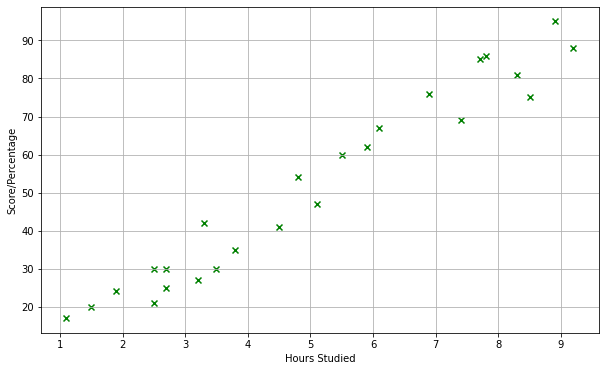

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Hours'], df['Scores'], color='green', marker='x')
plt.xlabel('Hours Studied')
plt.ylabel('Score/Percentage')
plt.grid(True)

In [4]:
X = df['Hours']
Y = df['Scores']
print(X.shape, Y.shape)

(25,) (25,)


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=24)
X_train = np.array(X_train, dtype='float32')
X_train = X_train.reshape(-1, 1)
X_test = np.array(X_test, dtype='float32')
X_test = X_test.reshape(-1, 1)

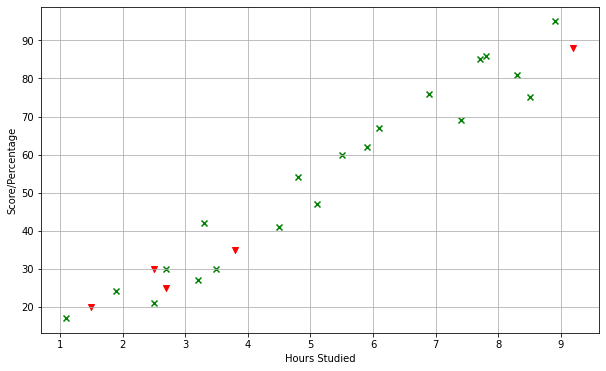

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, Y_train, color='green', marker='x')
plt.scatter(X_test, Y_test, color='red', marker='v')
plt.xlabel('Hours Studied')
plt.ylabel('Score/Percentage')
plt.grid(True)

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)
model.score(X_train, Y_train)

0.9437066867410017

In [8]:
print(model.coef_, model.intercept_)

[9.958191] 1.8707542


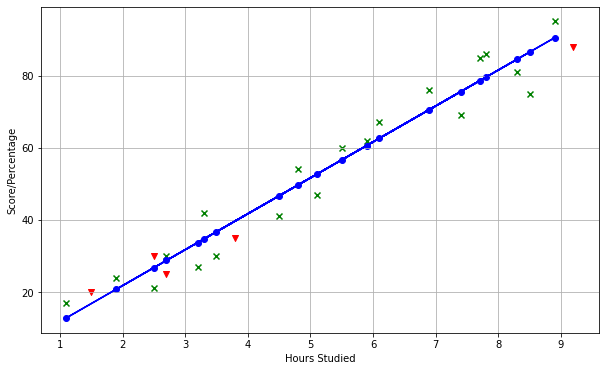

In [9]:
line = X_train * model.coef_[0] + model.intercept_
plt.figure(figsize=(10, 6))
plt.scatter(X_train, Y_train, color='green', marker='x')
plt.plot(X_train, line, color='blue')
plt.scatter(X_train, line, color='blue', marker='o')
plt.scatter(X_test, Y_test, color='red', marker='v')
plt.xlabel('Hours Studied')
plt.ylabel('Score/Percentage')
plt.grid(True)

In [10]:
Y_pred = model.predict(X_test)
Y_pred

array([26.766232, 93.486115, 39.71188 , 16.80804 , 28.75787 ],
      dtype=float32)

In [11]:
results = pd.DataFrame({"Y_test": Y_test, "Y_pred": Y_pred})
results.head()

,Y_test,Y_pred
16,30,26.766232
6,88,93.486115
22,35,39.711880
5,20,16.808041
9,25,28.757870


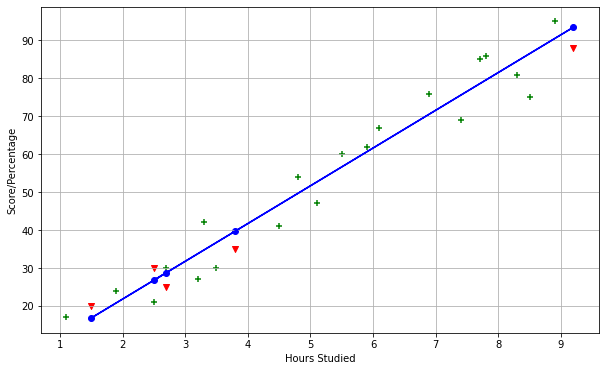

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, Y_train, color='green', marker='+')
plt.scatter(X_test, Y_test, color='red', marker='v')
plt.plot(X_test, Y_pred, color='blue')
plt.scatter(X_test, Y_pred, color='blue', marker='o')
plt.xlabel('Hours Studied')
plt.ylabel('Score/Percentage')
plt.grid(True)

In [13]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test, Y_pred)

4.076318359375

In [14]:
data = np.array([9.25], dtype='float32')
data = data.reshape(-1, 1)
model.predict(data)

array([93.984024], dtype=float32)

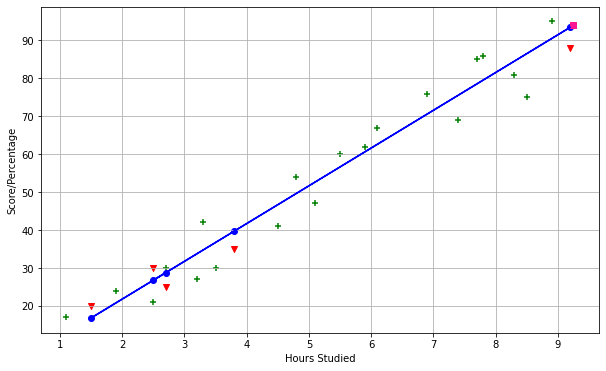

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, Y_train, color='green', marker='+')
plt.scatter(X_test, Y_test, color='red', marker='v')
plt.plot(X_test, Y_pred, color='blue')
plt.scatter(X_test, Y_pred, color='blue', marker='o')
plt.scatter(data, model.predict(data), color='deeppink', marker='s')
plt.xlabel('Hours Studied')
plt.ylabel('Score/Percentage')
plt.grid(True)